This notebook is used entirely for exploration of Gtex, parameters based on gene expression data.
Graphs and all

In [180]:
import pandas as pd
import csv
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,10
import matplotlib.mlab as mlab
from IPython.display import display
pd.options.display.max_columns = None
from numpy import random
from statsmodels import robust
import math

In [99]:
#gtex_shortlisted_w_genes = pd.read_csv('gtex_shortlisted_w_genes.tsv',sep='\t')
#gtex_shortlisted_w_genes_longformat = pickle.load( open( "gtex_shortlisted_w_genes_longformat.p", "rb" ) )

gene_parameter_df = pickle.load( open( "gene_parameter_df.p", "rb" ) )
gene_tissue_parameter_df = pickle.load( open( "gene_tissue_parameter_df.p", "rb" ) )
gene_exp_dict = pickle.load( open( "gene_exp_dict.p", "rb" ) )
gene_tissue_expression_dict = pickle.load( open( "gene_tissue_expression_dict.p", "rb" ) )

In [100]:
gene_parameter_df.head()

,25thPerctl,40thPerctl,75thPerctl,CoeffOfVar,Gene,IQR,MaxExp,MeanExp,MedianExp,MinExp,RangeOfExp,SDofExp
0,25.6675,39.850,78.3800,0.805969,SKI,52.7125,395.70,61.049416,51.725,0.4283,395.2717,49.203963
1,17.4850,26.158,48.4425,0.690925,H6PD,30.9575,223.00,35.651523,31.800,0.5193,222.4807,24.632513
2,10.4400,12.800,20.7900,1.026196,KIF1B,10.3500,218.40,21.807940,14.400,0.3578,218.0422,22.379219
3,10.2600,12.590,18.0600,0.467592,MTOR,7.8000,55.07,14.539722,14.040,0.2977,54.7723,6.798656
4,7.2850,9.514,15.9900,0.570146,MTHFR,8.7050,87.69,12.368994,11.070,0.4492,87.2408,7.052132


In [44]:
gene_tissue_parameter_df.head()

,CoeffOfVar,G_T,Gene,MaxExp,MeanExp,MedAbsDev,MedAbsDeviation/Median,MedianExp,MinExp,Ratioabv25P,Ratioabv50P,Ratioabv75P,SDofExp,Tissue,ZScore,DisMapExists
0,0.837952,GUCY2D_Stomach,GUCY2D,0.7951,0.162633,0.113152,0.859166,0.131700,0.000,0.858779,0.667939,0.293893,0.136278,Stomach,-0.106711,0
1,1.588247,NPHS1_Esophagus,NPHS1,0.7071,0.022639,0.020534,1.482602,0.013850,0.000,0.661117,0.336925,0.035260,0.035956,Esophagus,-0.169111,0
2,1.053262,PKLR_Stomach,PKLR,0.2710,0.039925,0.039156,1.191043,0.032875,0.000,0.583969,0.179389,0.003817,0.042051,Stomach,-0.157993,0
3,0.474845,ATP6AP2_Muscle,ATP6AP2,70.8000,16.507557,5.767323,0.393405,14.660000,5.726,0.001773,0.000000,0.000000,7.838529,Muscle,-1.361675,0
4,0.081605,HADHA_Fallopian Tube,HADHA,115.3000,99.842857,7.783662,0.077066,101.000000,88.000,1.000000,0.142857,0.000000,8.147674,Fallopian Tube,-0.341118,0


In [54]:
sum(gene_tissue_parameter_df['DisMapExists'])

2202

In [ ]:
ax = sns.boxplot( y="CoeffOfVar",x='DisMapExists', data=gene_tissue_parameter_df ,showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#ax.grid(b=True, which='major', color='grey', linewidth=1.0)
#ax.grid(b=True, which='minor', color='grey', linewidth=0.5) 

[Text(0,0,'0'), Text(0,0,'1')]

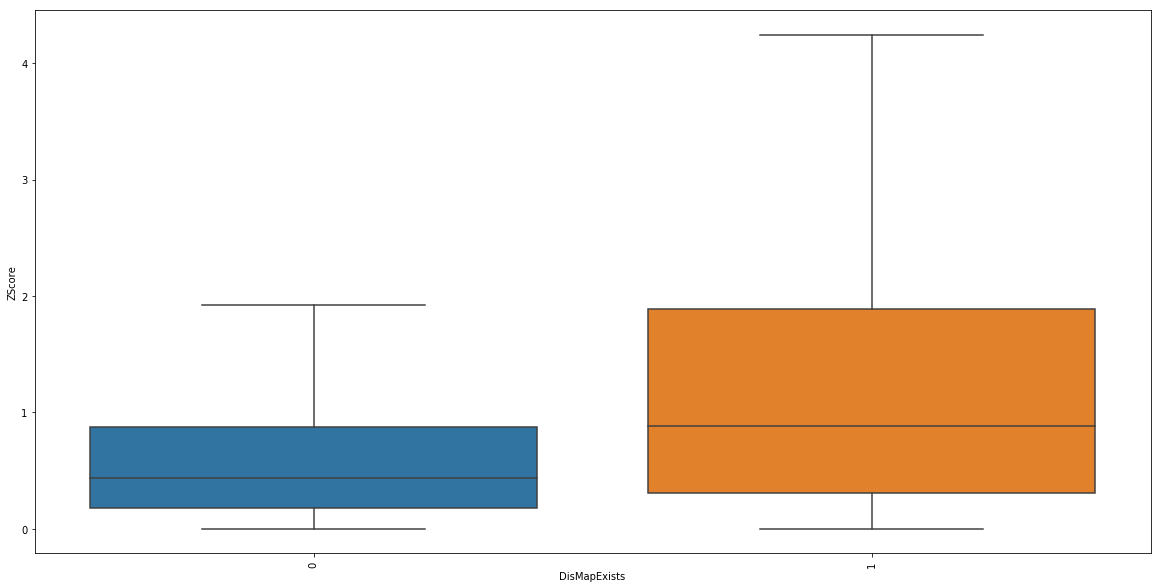

In [68]:
df = gene_tissue_parameter_df
#filtered_df = df[(df['Ratioabv25P']  > 0.75) & (df['ZScore'] > 0)]
filtered_df = df[(df['ZScore'] > 0)]
#ax = sns.boxplot( y="CoeffOfVar",x='DisMapExists', data=filtered_df,showfliers=False)
ax = sns.boxplot( y="ZScore",x='DisMapExists', data=filtered_df,showfliers=False)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


[Text(0,0,'Fallopian Tube'),
 Text(0,0,'Esophagus'),
 Text(0,0,'Brain'),
 Text(0,0,'Vagina'),
 Text(0,0,'Uterus'),
 Text(0,0,'Prostate'),
 Text(0,0,'Thyroid'),
 Text(0,0,'Testis'),
 Text(0,0,'Adipose Tissue'),
 Text(0,0,'Colon'),
 Text(0,0,'Liver'),
 Text(0,0,'Spleen'),
 Text(0,0,'Salivary Gland'),
 Text(0,0,'Small Intestine'),
 Text(0,0,'Bladder'),
 Text(0,0,'Cervix Uteri'),
 Text(0,0,'Lung'),
 Text(0,0,'Pituitary'),
 Text(0,0,'Breast'),
 Text(0,0,'Ovary'),
 Text(0,0,'Nerve'),
 Text(0,0,'Muscle'),
 Text(0,0,'Blood'),
 Text(0,0,'Adrenal Gland'),
 Text(0,0,'Skin'),
 Text(0,0,'Blood Vessel'),
 Text(0,0,'Kidney'),
 Text(0,0,'Pancreas'),
 Text(0,0,'Heart'),
 Text(0,0,'Stomach')]

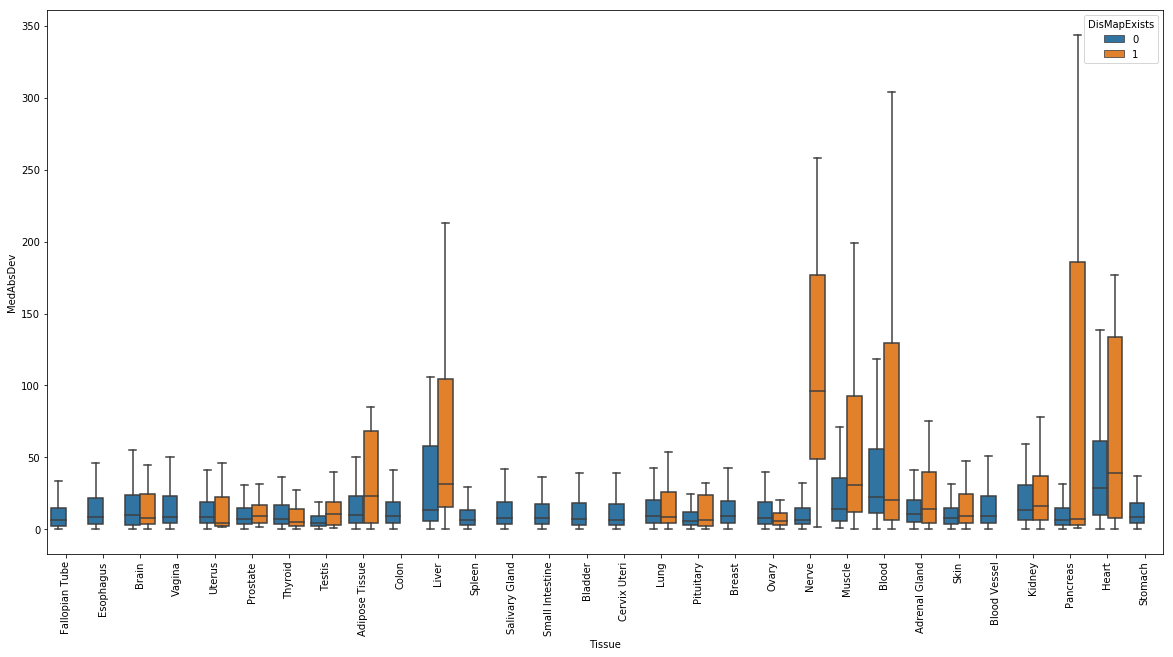

In [51]:
ax = sns.boxplot( y="MedAbsDev",x='Tissue',hue = 'DisMapExists', data=filtered_df,showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


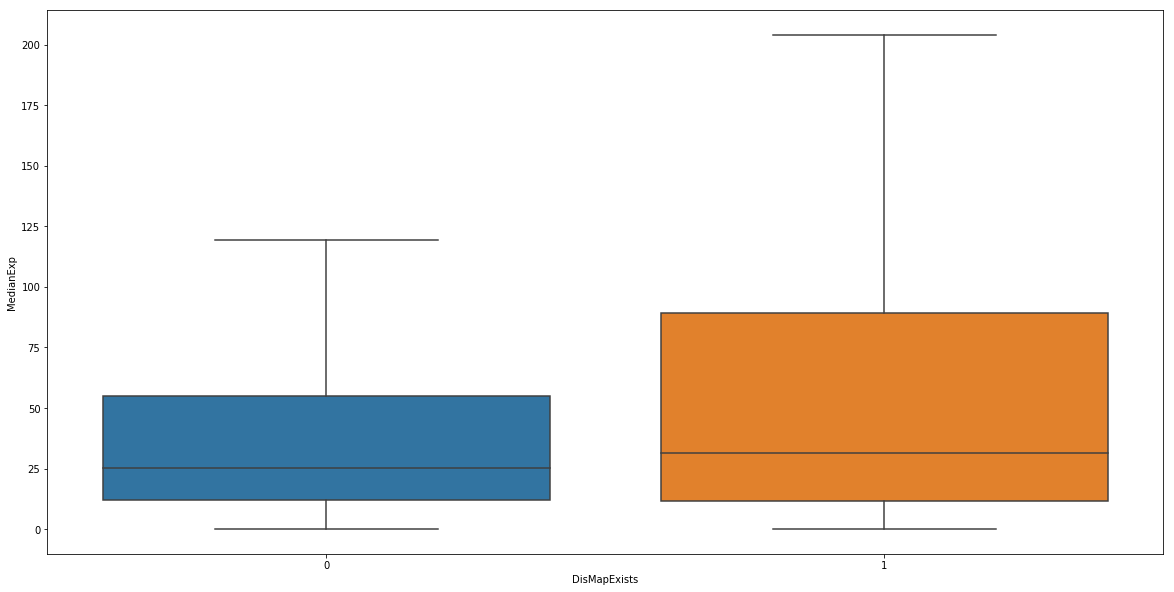

In [48]:
ax = sns.boxplot( y="MedianExp",x='DisMapExists', data=filtered_df,showfliers=False)

In [73]:
gene_tissue_parameter_df_binned = gene_tissue_parameter_df.copy()

In [115]:
gene_tissue_parameter_df_binned = gene_tissue_parameter_df_binned.sort_values(by=['Gene'])
gene_tissue_parameter_df_binned.tail(10)

,CoeffOfVar,G_T,Gene,MaxExp,MeanExp,MedAbsDev,MedAbsDeviation/Median,MedianExp,MinExp,Ratioabv25P,Ratioabv50P,Ratioabv75P,SDofExp,Tissue,ZScore,DisMapExists,Bin,MeanofZsc,MedianofZsc
18032,0.949186,ZIC3_Cervix Uteri,ZIC3,0.05864,0.017990,0.012335,0.538657,0.0229,0.0000,1.0,1.0,0.090909,0.017076,Cervix Uteri,-0.185482,0,b1,-0.185482,-0.184465
22661,1.679986,ZIC3_Thyroid,ZIC3,0.10420,0.008832,0.000000,NaN,0.0000,0.0000,1.0,1.0,0.085202,0.014837,Thyroid,-0.187379,0,b1,-0.187379,-0.189209
26334,2.595747,ZIC3_Liver,ZIC3,0.06344,0.002874,0.000000,NaN,0.0000,0.0000,1.0,1.0,0.005714,0.007460,Liver,-0.188613,0,b1,-0.188613,-0.189209
10272,1.694125,ZIC3_Fallopian Tube,ZIC3,0.02433,0.005246,0.000000,NaN,0.0000,0.0000,1.0,1.0,0.000000,0.008887,Fallopian Tube,-0.188122,0,b1,-0.188122,-0.189209
28099,0.732545,ZIC3_Pituitary,ZIC3,7.73000,1.292303,0.673101,0.642272,1.0480,0.1716,1.0,1.0,1.000000,0.946670,Pituitary,0.078509,0,b2,0.078509,0.027899
17846,2.639884,ZIC3_Blood,ZIC3,0.11100,0.005208,0.000000,NaN,0.0000,0.0000,1.0,1.0,0.037244,0.013750,Blood,-0.188130,0,b1,-0.188130,-0.189209
17730,2.905277,ZIC3_Heart,ZIC3,0.28300,0.005165,0.000000,NaN,0.0000,0.0000,1.0,1.0,0.026667,0.015006,Heart,-0.188139,1,b1,-0.188139,-0.189209
20436,3.147479,ZIC3_Adipose Tissue,ZIC3,1.11100,0.018731,0.000000,NaN,0.0000,0.0000,1.0,1.0,0.158093,0.058955,Adipose Tissue,-0.185328,0,b1,-0.185328,-0.189209
9153,1.492748,ZIC3_Kidney,ZIC3,0.07134,0.009663,0.000000,NaN,0.0000,0.0000,1.0,1.0,0.088889,0.014424,Kidney,-0.187207,0,b1,-0.187207,-0.189209
20647,1.903500,ZIC3_Vagina,ZIC3,0.08333,0.006894,0.000000,NaN,0.0000,0.0000,1.0,1.0,0.052174,0.013122,Vagina,-0.187780,0,b1,-0.187780,-0.189209


In [85]:
data = gene_tissue_parameter_df_binned['MeanExp']
l1 = np.min(data)
l2  = np.percentile(data, 20)
l3 = np.percentile(data, 40)
l4 = np.percentile(data, 60)
l5 = np.percentile(data, 80)
l6 = np.max(data)
bins = []

for index, row in gene_tissue_parameter_df_binned.iterrows():
    if row['MeanExp']< l2:
        bins.append('b1')
    elif row['MeanExp']< l3:
        bins.append('b2')
    elif row['MeanExp']< l4:
        bins.append('b3')
    elif row['MeanExp']< l5:
        bins.append('b4')
    else:
        bins.append('b5')
        
gene_tissue_parameter_df_binned['Bin'] = bins
        


In [113]:
MeanofZsc = []
MedianofZsc = []
count = 0
for index, row in gene_tissue_parameter_df_binned.iterrows():
    count+=1
    gene = row['Gene']
    g_t = row['G_T']
    data = gene_tissue_expression_dict[g_t]
    trow = gene_parameter_df[gene_parameter_df['Gene'] == gene]
    gene_mean = trow['MeanExp']
    gene_sd = trow['SDofExp']
    z_sc_list = []
    for i in data:
        zc = float((i-gene_mean)/gene_sd)
        z_sc_list.append(zc)
    MeanofZsc.append(float(np.mean(z_sc_list)))
    MedianofZsc.append(float(np.median(z_sc_list)))
    if count%1000 == 0:
        print(count)
gene_tissue_parameter_df_binned['MeanofZsc'] = MeanofZsc
gene_tissue_parameter_df_binned['MedianofZsc'] = MedianofZsc


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000


In [ ]:
CoeffOfVar_of_Meanof
for index, row in gene_tissue_parameter_df_binned.iterrows():
    

In [112]:
gene_tissue_parameter_df_binned.shape

(28170, 17)

[Text(0,0,'b1'),
 Text(0,0,'b2'),
 Text(0,0,'b3'),
 Text(0,0,'b4'),
 Text(0,0,'b5')]

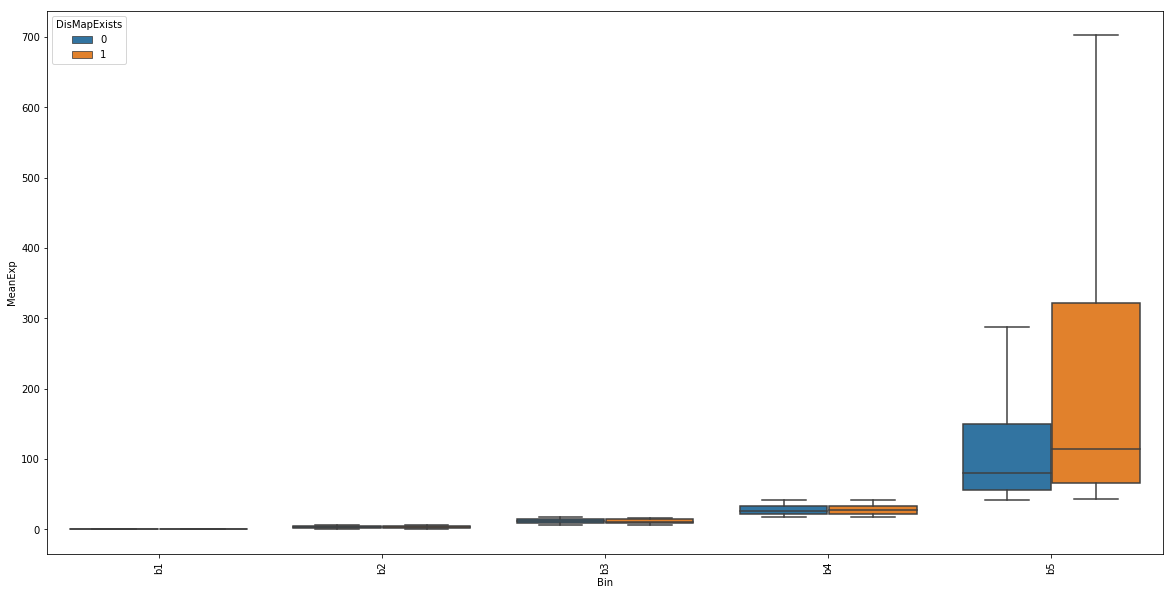

In [97]:
df = gene_tissue_parameter_df_binned
#filtered_df = df[(df['Ratioabv25P']  > 0.75) & (df['ZScore'] > 0)]
filtered_df = df[(df['ZScore'] > 0)]
ax = sns.boxplot( y="MeanExp",x='Bin', hue = 'DisMapExists',data=filtered_df,showfliers=False)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#ax.grid(b=True, which='major', color='grey', linewidth=1.0)


In [120]:
gene_tissue_parameter_df_binned = gene_tissue_parameter_df_binned.sort_values(by=['Gene'])
gene_tissue_parameter_df_binned.tail(10)

,CoeffOfVar,G_T,Gene,MaxExp,MeanExp,MedAbsDev,MedAbsDeviation/Median,MedianExp,MinExp,Ratioabv25P,Ratioabv50P,Ratioabv75P,SDofExp,Tissue,ZScore,DisMapExists,Bin,MeanofZsc,MedianofZsc
17810,1.925388,ZIC3_Adrenal Gland,ZIC3,0.03736,0.004153,0.000000,NaN,0.000000,0.00000,1.0,1.0,0.015789,0.007996,Adrenal Gland,-0.188348,0,b1,-0.188348,-0.189209
9153,1.492748,ZIC3_Kidney,ZIC3,0.07134,0.009663,0.000000,NaN,0.000000,0.00000,1.0,1.0,0.088889,0.014424,Kidney,-0.187207,0,b1,-0.187207,-0.189209
18587,1.676831,ZIC3_Stomach,ZIC3,0.31200,0.023823,0.012570,1.482602,0.008478,0.00000,1.0,1.0,0.225191,0.039948,Stomach,-0.184273,0,b1,-0.184273,-0.187452
4156,2.798210,ZIC3_Esophagus,ZIC3,0.19110,0.004407,0.000000,NaN,0.000000,0.00000,1.0,1.0,0.032321,0.012332,Esophagus,-0.188296,0,b1,-0.188296,-0.189209
13963,1.976335,ZIC3_Blood Vessel,ZIC3,0.42560,0.012369,0.000000,NaN,0.000000,0.00000,1.0,1.0,0.116101,0.024446,Blood Vessel,-0.186646,0,b1,-0.186646,-0.189209
17709,1.890323,ZIC3_Brain,ZIC3,97.13000,6.068506,0.769619,0.752316,1.023000,0.02451,1.0,1.0,0.998205,11.471436,Brain,1.067963,0,b2,1.067963,0.022719
23301,2.279015,ZIC3_Bladder,ZIC3,0.05599,0.007512,0.000000,NaN,0.000000,0.00000,1.0,1.0,0.090909,0.017120,Bladder,-0.187652,0,b1,-0.187652,-0.189209
27411,2.118517,ZIC3_Spleen,ZIC3,0.08940,0.006766,0.000000,NaN,0.000000,0.00000,1.0,1.0,0.049383,0.014334,Spleen,-0.187807,0,b1,-0.187807,-0.189209
23368,2.259592,ZIC3_Salivary Gland,ZIC3,0.04408,0.003961,0.000000,NaN,0.000000,0.00000,1.0,1.0,0.030928,0.008951,Salivary Gland,-0.188388,0,b1,-0.188388,-0.189209
20647,1.903500,ZIC3_Vagina,ZIC3,0.08333,0.006894,0.000000,NaN,0.000000,0.00000,1.0,1.0,0.052174,0.013122,Vagina,-0.187780,0,b1,-0.187780,-0.189209


[Text(0,0,'b5'),
 Text(0,0,'b4'),
 Text(0,0,'b3'),
 Text(0,0,'b2'),
 Text(0,0,'b1')]

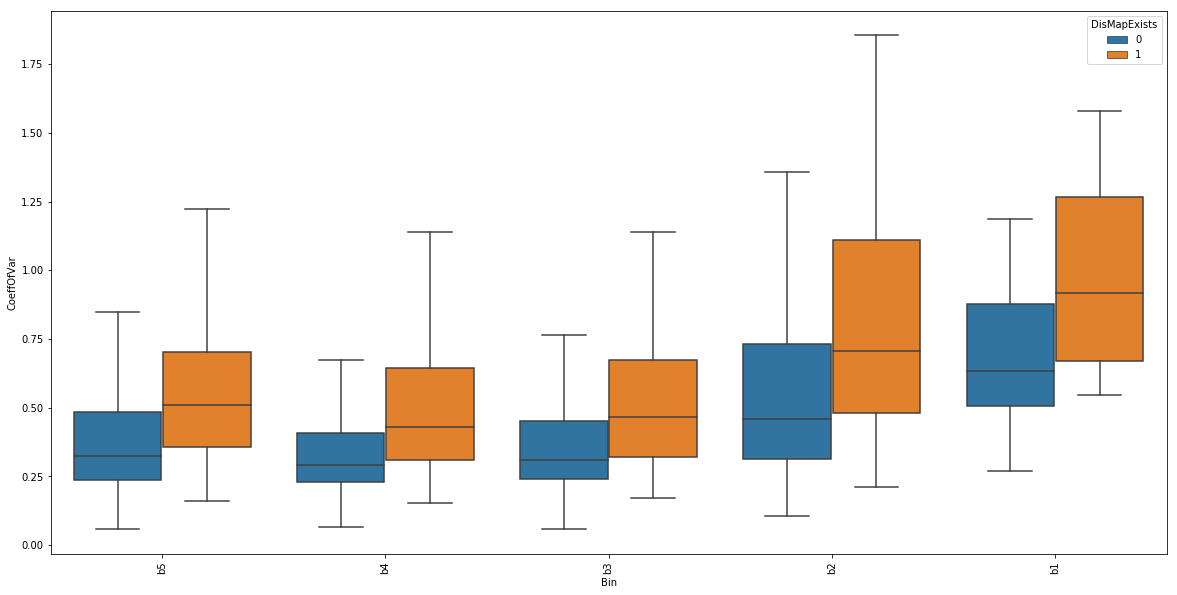

In [122]:
df = gene_tissue_parameter_df_binned
#filtered_df = df[(df['Ratioabv25P']  > 0.75) & (df['ZScore'] > 0)]
filtered_df = df[(df['MedianofZsc'] > 0)]
ax = sns.boxplot( y="CoeffOfVar",x='Bin', hue = 'DisMapExists',data=filtered_df,showfliers=False)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#ax.grid(b=True, which='major', color='grey', linewidth=1.0)


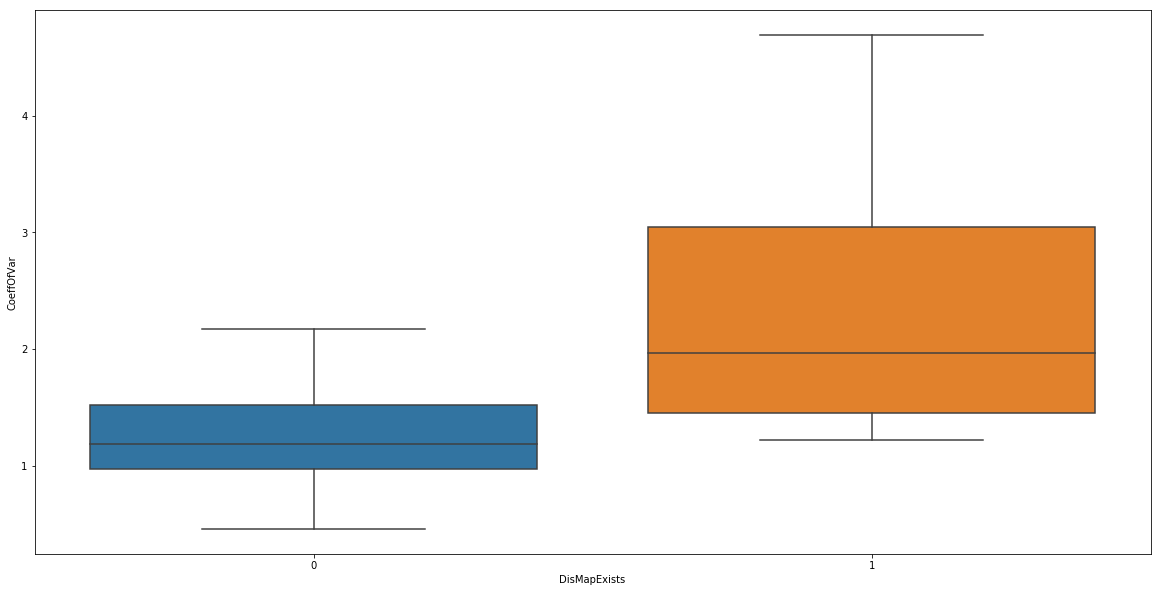

In [151]:
gene_tissue_parameter_df_binned = gene_tissue_parameter_df_binned.sort_values(by=['DisMapExists'])
x = gene_tissue_parameter_df_binned[gene_tissue_parameter_df_binned['Gene'] == 'GDF5']
ax = sns.boxplot( y="CoeffOfVar",x='DisMapExists',data=x,showfliers=False)

In [142]:
#gene_tissue_parameter_df_binned
grouped = gene_tissue_parameter_df_binned.groupby(['Gene', 'DisMapExists'])
CV_table_mean = grouped['CoeffOfVar'].mean()
CV_table_mean = CV_table_mean.unstack()
CV_table_mean.head()
CV_table_median = grouped['CoeffOfVar'].median()
CV_table_median = CV_table_median.unstack()
CV_table_mean.head()

DisMapExists,0,1
Gene,,
A2M,0.673118,0.724604
A4GALT,0.531028,0.960084
AAAS,0.329877,0.237007
AASS,0.676429,0.687713
ABCA1,0.632462,0.934002


In [181]:
ratio = []
for index,row in CV_table_mean.iterrows():
    ratio_v = row[1]/row[0]
    ratio.append(math.log10(ratio_v))
    
CV_table_mean['LogRatio'] = ratio

In [188]:
ratio = []
for index,row in CV_table_median.iterrows():
    ratio_v = row[1]/row[0]
    ratio.append(math.log10(ratio_v))
    
CV_table_median['LogRatio'] = ratio

In [182]:
CV_table_mean.head()

DisMapExists,0,1,Ratio,LogRatio
Gene,,,,
A2M,0.673118,0.724604,1.076488,0.032009
A4GALT,0.531028,0.960084,1.807972,0.257192
AAAS,0.329877,0.237007,0.718473,-0.143590
AASS,0.676429,0.687713,1.016683,0.007186
ABCA1,0.632462,0.934002,1.476770,0.169313


In [187]:
count = 0
for index, row in CV_table_mean.iterrows():
    if row['LogRatio'] >0:
        count+=1
print(count/924)

0.6222943722943723


In [190]:
count = 0
for index, row in CV_table_median.iterrows():
    if row['LogRatio'] >0:
        count+=1
print(count/924)

0.7002164502164502


924


/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


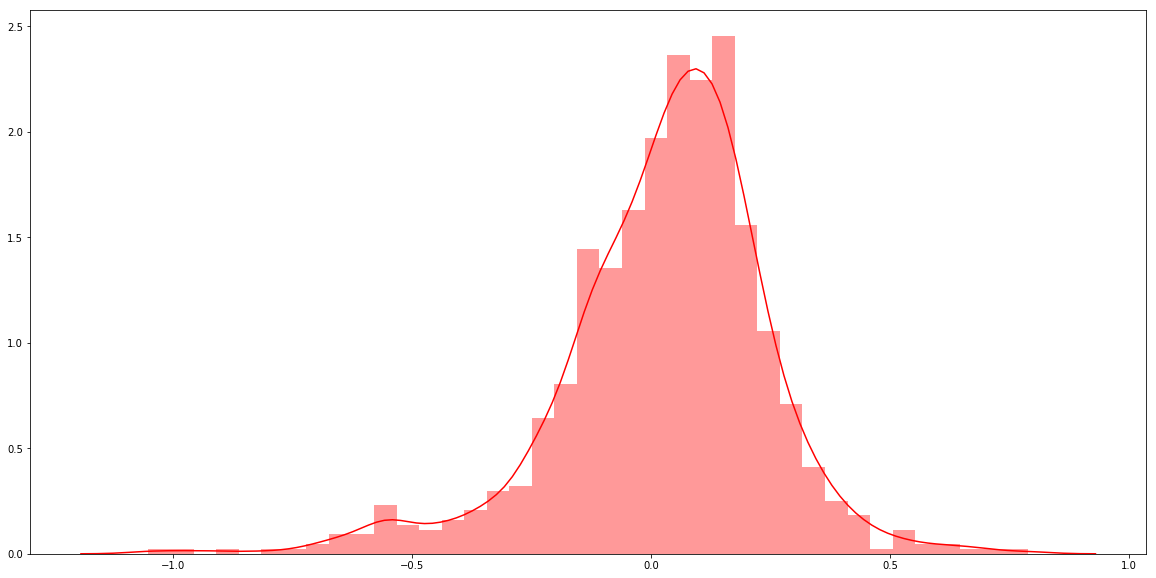

In [185]:
CV_table_mean_ratio = CV_table_mean['LogRatio'].tolist()
CV_table_mean_ratio = [x for x in CV_table_mean_ratio if str(x) != 'nan']
print(len(CV_table_mean_ratio))
sns.distplot(CV_table_mean_ratio,color='r')

924


/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


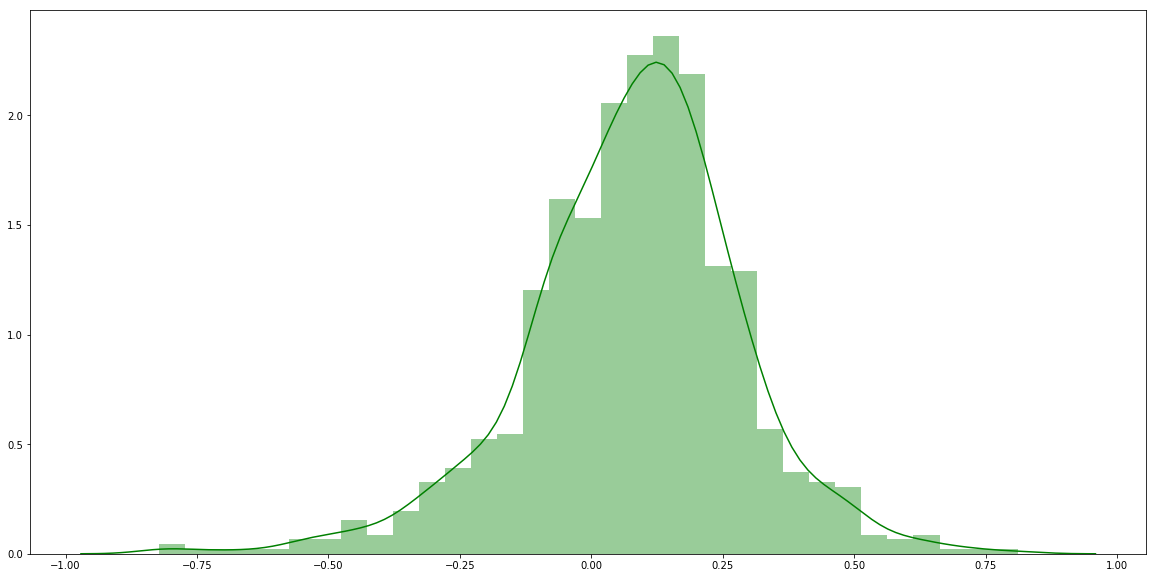

In [189]:
CV_table_median_ratio = CV_table_median['LogRatio'].tolist()
CV_table_median_ratio = [x for x in CV_table_median_ratio if str(x) != 'nan']
print(len(CV_table_median_ratio))
sns.distplot(CV_table_median_ratio,color='g')